# API Data Wrangling with Open-Meteo

In this exercise, we will:

- Fetch historical weather data using the **Open-Meteo API**.
- Parse and clean the data using **pandas**.
- Perform exploratory data analysis.
- Visualize weather trends.

In [5]:
# Install required packages if not already installed
!pip install requests pandas matplotlib --quiet

In [6]:
# Import Libraries
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Optional: Configure matplotlib for inline display in Jupyter
%matplotlib inline

## Understand the Open-Meteo API

- **API Endpoint**: `https://archive-api.open-meteo.com/v1/archive`
- **Parameters**:
  - `latitude`: Latitude of the location.
  - `longitude`: Longitude of the location.
  - `start_date`: Start date of the data (YYYY-MM-DD).
  - `end_date`: End date of the data (YYYY-MM-DD).
  - `hourly`: Comma-separated list of variables (e.g., temperature, precipitation).
  - `timezone`: Timezone of the data.

**Documentation**: [Open-Meteo API Docs](https://open-meteo.com/en/docs)

In [8]:
# Step 1: Set Up Parameters

# Location coordinates for New York City
latitude = 40.7128
longitude = -74.0060

# Date range
start_date = '2023-01-01'
end_date = '2023-01-07'  # One week of data

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [9]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/New_York'
}

response = requests.get(base_url, params=params)


In [10]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [11]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()


,time,temperature_2m,relativehumidity_2m,precipitation
0,2023-01-01T00:00,10.7,99,1.0
1,2023-01-01T01:00,10.5,99,1.0
2,2023-01-01T02:00,10.4,98,0.1
3,2023-01-01T03:00,10.3,96,0.0
4,2023-01-01T04:00,9.7,95,0.0


In [12]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [13]:
# Handle missing values (if any)
df.fillna(method='ffill', inplace=True)  # Forward fill


/var/folders/zg/81kjn_8j4692tlw3f6q33h6w0000gq/T/ipykernel_13635/1928920962.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)  # Forward fill


In [14]:
# Step 5: Exploratory Data Analysis

# Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,168.000000,168.000000,168.000000
mean,8.371429,86.422619,0.142857
std,3.495063,12.799933,0.436037
min,0.400000,45.000000,0.000000
25%,5.900000,81.000000,0.000000
50%,8.250000,90.500000,0.000000
75%,11.100000,97.000000,0.000000
max,17.900000,100.000000,3.100000


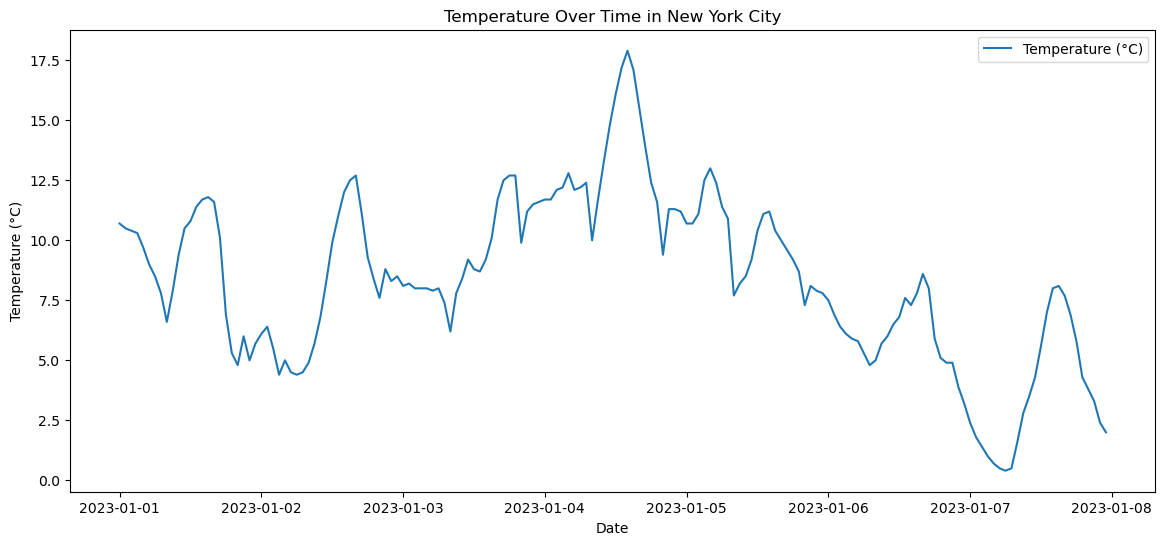

In [15]:
# Plot Temperature Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['temperature_2m'], label='Temperature (°C)')
plt.title('Temperature Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

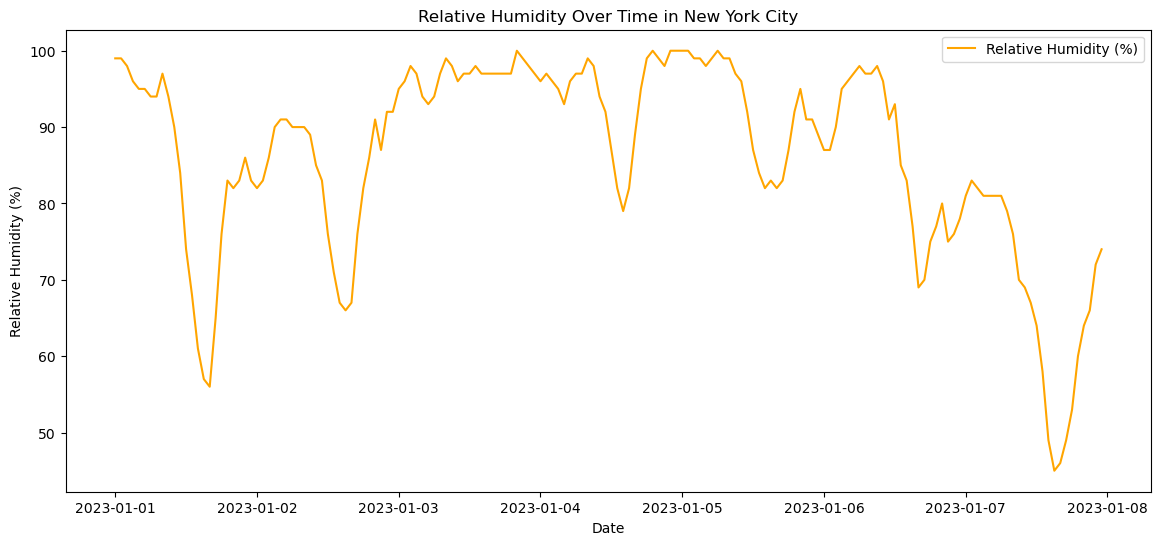

In [16]:
# Plot Relative Humidity Over Time

plt.figure(figsize=(14, 6))
plt.plot(df.index, df['relativehumidity_2m'], color='orange', label='Relative Humidity (%)')
plt.title('Relative Humidity Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Relative Humidity (%)')
plt.legend()
plt.show()


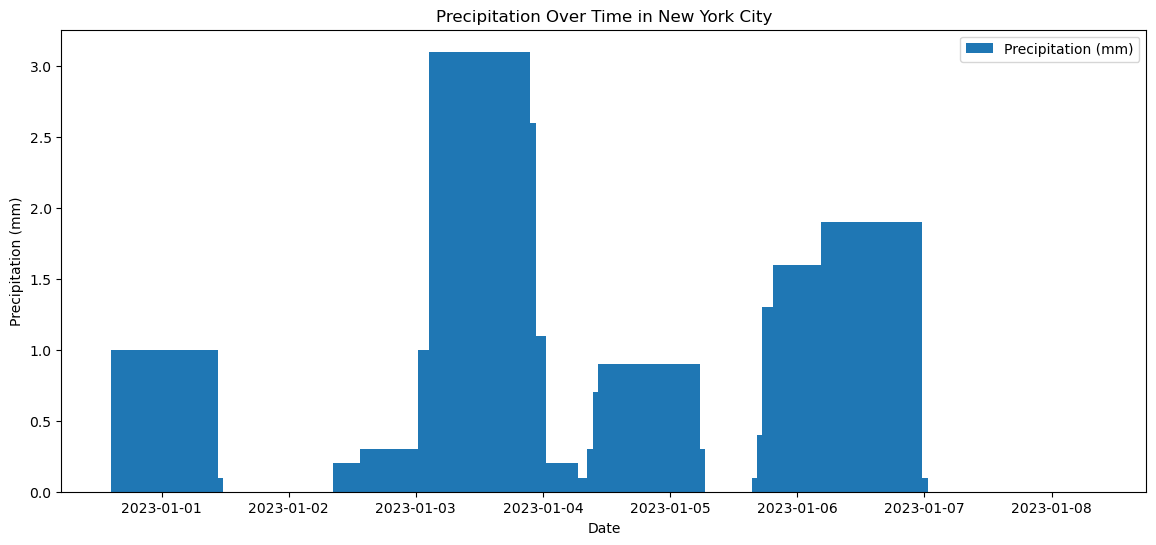

In [17]:
# Plot Precipitation Over Time

plt.figure(figsize=(14, 6))
plt.bar(df.index, df['precipitation'], label='Precipitation (mm)')
plt.title('Precipitation Over Time in New York City')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()
plt.show()


In [18]:
# Step 6: Correlation Analysis

# Calculate correlation between temperature and humidity
correlation = df['temperature_2m'].corr(df['relativehumidity_2m'])
print(f'Correlation between Temperature and Relative Humidity: {correlation:.2f}')


Correlation between Temperature and Relative Humidity: 0.24


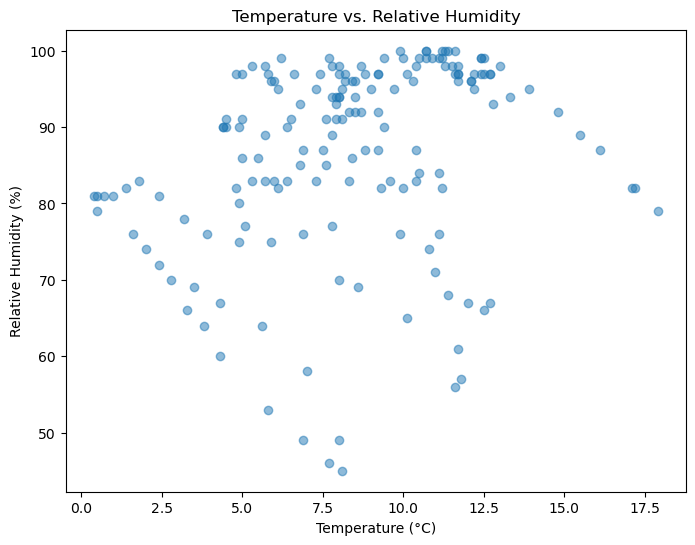

In [19]:
# Scatter Plot of Temperature vs. Relative Humidity

plt.figure(figsize=(8, 6))
plt.scatter(df['temperature_2m'], df['relativehumidity_2m'], alpha=0.5)
plt.title('Temperature vs. Relative Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Relative Humidity (%)')
plt.show()


In [20]:
# Step 7: Resample Data to Daily Averages
# Resamples time-series data into daily frequency bins (one bin per day) assuming the data has a DatetimeIndex
daily_avg = df.resample('D').mean() # then calculates the mean of all numeric columns for each daily bin.
daily_avg.head()


,temperature_2m,relativehumidity_2m,precipitation
time,,,
2023-01-01,8.850000,83.708333,0.087500
2023-01-02,7.775000,83.458333,0.020833
2023-01-03,9.408333,96.875000,0.395833
2023-01-04,12.995833,94.166667,0.095833
2023-01-05,9.916667,92.666667,0.000000


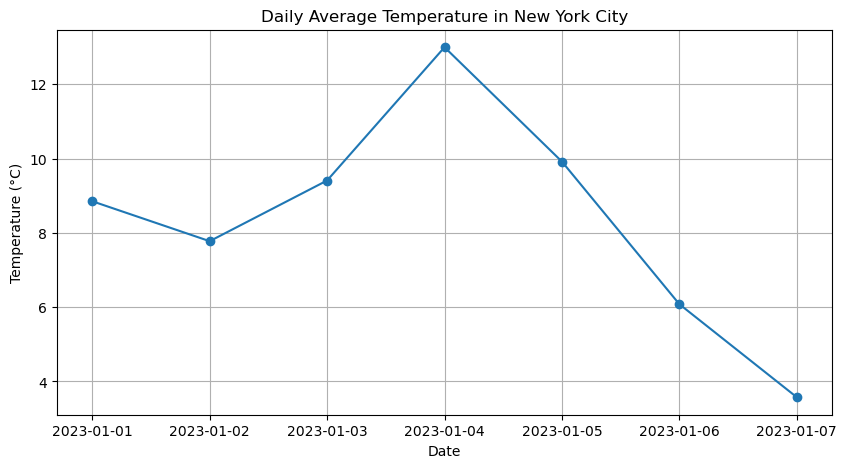

In [21]:
# Plot Daily Average Temperature

plt.figure(figsize=(10, 5))
plt.plot(daily_avg.index, daily_avg['temperature_2m'], marker='o')
plt.title('Daily Average Temperature in New York City')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()


In [22]:
# Step 8: Compare with Another Location (Los Angeles)

# Coordinates for Los Angeles
latitude_la = 34.0522
longitude_la = -118.2437

params_la = {
    'latitude': latitude_la,
    'longitude': longitude_la,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response_la = requests.get(base_url, params=params_la)

# Load and clean Los Angeles data
data_la = response_la.json()
hourly_data_la = data_la['hourly']
df_la = pd.DataFrame(hourly_data_la)

df_la['time'] = pd.to_datetime(df_la['time'])
df_la.set_index('time', inplace=True)
df_la.fillna(method='ffill', inplace=True)


/var/folders/zg/81kjn_8j4692tlw3f6q33h6w0000gq/T/ipykernel_13635/4259999984.py:25: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_la.fillna(method='ffill', inplace=True)


In [23]:
# Resample Los Angeles Data to Daily Averages

daily_avg_la = df_la.resample('D').mean()


In [24]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'New York': daily_avg['temperature_2m'],
    'Los Angeles': daily_avg_la['temperature_2m']
})
combined_temp.head()

,New York,Los Angeles
time,,
2023-01-01,8.850000,12.433333
2023-01-02,7.775000,9.483333
2023-01-03,9.408333,11.808333
2023-01-04,12.995833,13.766667
2023-01-05,9.916667,12.183333


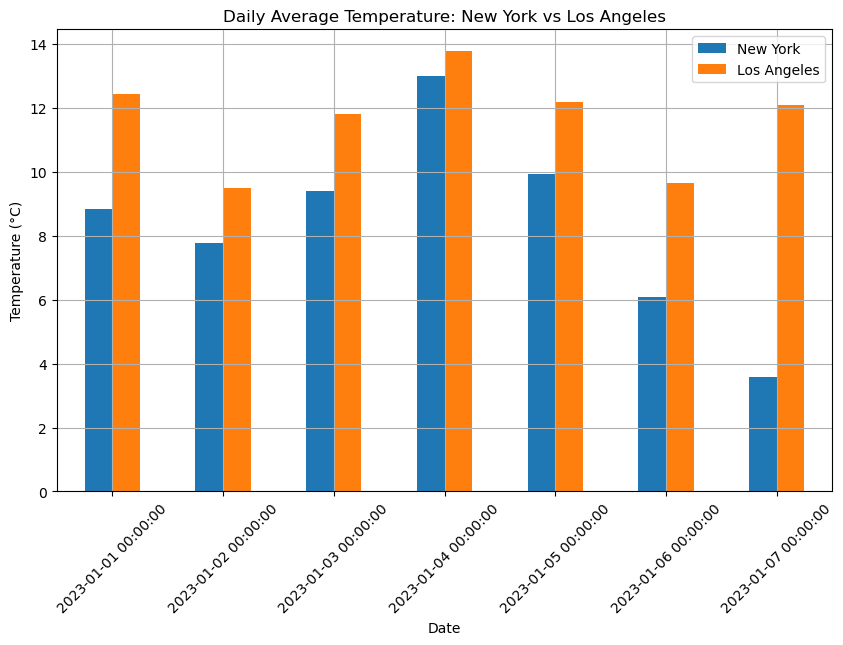

In [25]:
# Plot Comparison of Daily Average Temperature

combined_temp.plot(kind='bar', figsize=(10, 6))
plt.title('Daily Average Temperature: New York vs Los Angeles')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [26]:
# Step 9: Advanced Analysis - Temperature Difference

# Calculate Temperature Difference
combined_temp['Temp Difference'] = combined_temp['Los Angeles'] - combined_temp['New York']
combined_temp


,New York,Los Angeles,Temp Difference
time,,,
2023-01-01,8.850000,12.433333,3.583333
2023-01-02,7.775000,9.483333,1.708333
2023-01-03,9.408333,11.808333,2.400000
2023-01-04,12.995833,13.766667,0.770833
2023-01-05,9.916667,12.183333,2.266667
2023-01-06,6.079167,9.662500,3.583333
2023-01-07,3.575000,12.095833,8.520833


In [27]:
# Step 10: Save Data to CSV (Optional)

# Save New York data
df.to_csv('new_york_weather.csv')

# Save Los Angeles data
df_la.to_csv('los_angeles_weather.csv')


## Conclusion

In this exercise, we:

- Accessed and retrieved data from the **Open-Meteo API**.
- Cleaned and preprocessed JSON data using **pandas**.
- Performed exploratory data analysis and visualization.
- Compared weather patterns between **New York City** and **Los Angeles**.

---

**Next Steps**:

- **Extend the Date Range**: Analyze seasonal trends by fetching data over several months.
- **Fetch Additional Variables**: Include wind speed, atmospheric pressure, or other interesting variables.
- **Forecasting**: Use statistical methods or machine learning models to forecast future weather patterns.
- **Global Analysis**: Compare data from other global cities to gain broader insights.


## Exercises for Students

Now it's your turn! Below are some exercises to reinforce what you've learned. Try to complete them without looking at the solutions.

### Exercise: Compare Rainfall Between London and Seattle

- **Objective**: Compare the total weekly rainfall between London and Seattle over a full year.
- **Tasks**:
  1. **Fetch Data**: Retrieve hourly precipitation data for London and Seattle for the year 2022.
     - **London Coordinates**: Latitude `51.5074`, Longitude `-0.1278`
     - **Seattle Coordinates**: Latitude `47.6062`, Longitude `-122.3321`
  2. **Data Cleaning**: Convert the time columns to datetime objects and set them as the index. Handle any missing values.
  3. **Resample Data**: Resample the hourly data to weekly totals.
  4. **Visualization**: Plot the weekly total precipitation for both cities on the same graph.
  5. **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.

**Note**: Remember to handle any API limitations, such as data availability or rate limits, and to be mindful of the size of the data you're requesting.

### Tips:

- **API Parameters**: Make sure to adjust the parameters like `latitude`, `longitude`, `start_date`, `end_date`, `hourly`, and `timezone` as needed.
- **Error Handling**: Always check if your API requests are successful before proceeding.
- **Data Storage**: Consider saving your DataFrames to CSV files for future analysis.
- **Visualization**: Customize your plots with titles, labels, legends, and gridlines for better readability.

Happy coding!


In [30]:
# Step 1: Set Up Parameters for London

# Location coordinates for London
latitude = 51.5074
longitude = -0.1278

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [31]:
# Step 2: Make the API Request

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'Europe/London'
}

response = requests.get(base_url, params=params)


In [32]:
# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')


Data fetched successfully!


In [33]:
# Step 3: Load Data into pandas DataFrame

data = response.json()
hourly_data = data['hourly']

df = pd.DataFrame(hourly_data)
df.head()

,time,temperature_2m,relativehumidity_2m,precipitation
0,2022-01-01T00:00,12.7,91,0.0
1,2022-01-01T01:00,12.7,93,0.0
2,2022-01-01T02:00,12.8,93,0.0
3,2022-01-01T03:00,12.5,93,0.0
4,2022-01-01T04:00,12.3,92,0.0


In [34]:
# Step 4: Data Cleaning

# Convert 'time' column to datetime
df['time'] = pd.to_datetime(df['time'])

# Set 'time' as the index
df.set_index('time', inplace=True)

# Check for missing values
df.isnull().sum()


temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [35]:
# Step 5: Exploratory Data Analysis

# London Summary Statistics
df.describe()

,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,12.013082,76.635388,0.075662
std,6.651766,16.722080,0.404500
min,-5.400000,17.000000,0.000000
25%,7.400000,65.000000,0.000000
50%,11.900000,81.000000,0.000000
75%,16.400000,90.000000,0.000000
max,38.000000,100.000000,14.700000


In [36]:
# Step 1: Set Up Parameters for Seattle 

# Location coordinates for Seattle City
latitude = 47.6062
longitude = -122.3321

# Date range
start_date = '2022-01-01'
end_date = '2022-12-31'  

# Variables to fetch
hourly_variables = ['temperature_2m', 'relativehumidity_2m', 'precipitation']


In [37]:
# Step 2: Make the API Request for Seattle Data

base_url = 'https://archive-api.open-meteo.com/v1/archive'

params = {
    'latitude': latitude,
    'longitude': longitude,
    'start_date': start_date,
    'end_date': end_date,
    'hourly': ','.join(hourly_variables),
    'timezone': 'America/Los_Angeles'
}

response = requests.get(base_url, params=params)

# Check if the request was successful

if response.status_code == 200:
    print('Data fetched successfully!')
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')

Data fetched successfully!


In [38]:
# Step 3: Load Data into pandas DataFrame

data_se = response.json()
hourly_data_se = data_se['hourly']

df_se = pd.DataFrame(hourly_data_se)
print(df_se.head())
df_se.describe()

               time  temperature_2m  relativehumidity_2m  precipitation
0  2022-01-01T00:00            -6.3                   77            0.0
1  2022-01-01T01:00            -6.4                   76            0.0
2  2022-01-01T02:00            -8.3                   82            0.0
3  2022-01-01T03:00            -8.1                   82            0.0
4  2022-01-01T04:00            -7.9                   81            0.0


,temperature_2m,relativehumidity_2m,precipitation
count,8760.000000,8760.000000,8760.000000
mean,10.484920,78.175799,0.129132
std,6.643276,14.031781,0.463708
min,-8.300000,20.000000,0.000000
25%,5.400000,69.000000,0.000000
50%,9.700000,81.000000,0.000000
75%,15.200000,89.000000,0.000000
max,31.100000,100.000000,7.700000


In [39]:
# Step 4: Seattle Data Cleaning

# Convert 'time' column to datetime
df_se['time'] = pd.to_datetime(df_se['time'])

# Set 'time' as the index
df_se.set_index('time', inplace=True)

# Check for missing values
df_se.isnull().sum()

temperature_2m         0
relativehumidity_2m    0
precipitation          0
dtype: int64

In [40]:
# Combine DataFrames for Comparison

combined_temp = pd.DataFrame({
    'London York': df['precipitation'],
    'Seattle': df_se['precipitation']
})
combined_temp.head()

,London York,Seattle
time,,
2022-01-01 00:00:00,0.0,0.0
2022-01-01 01:00:00,0.0,0.0
2022-01-01 02:00:00,0.0,0.0
2022-01-01 03:00:00,0.0,0.0
2022-01-01 04:00:00,0.0,0.0


In [41]:
# Step 7: Resample Data to Daily Totals
# Resamples time-series data into daily frequency bins (one bin per day) assuming the data has a DatetimeIndex
daily_sum = combined_temp.resample('D').sum() # then calculates the sum of all numeric columns for each daily bin.
print(daily_sum.head())
daily_sum.shape

            London York  Seattle
time                            
2022-01-01          0.2      0.0
2022-01-02          2.0     31.3
2022-01-03          0.0     24.1
2022-01-04          2.5      2.5
2022-01-05          0.0      7.6


(365, 2)

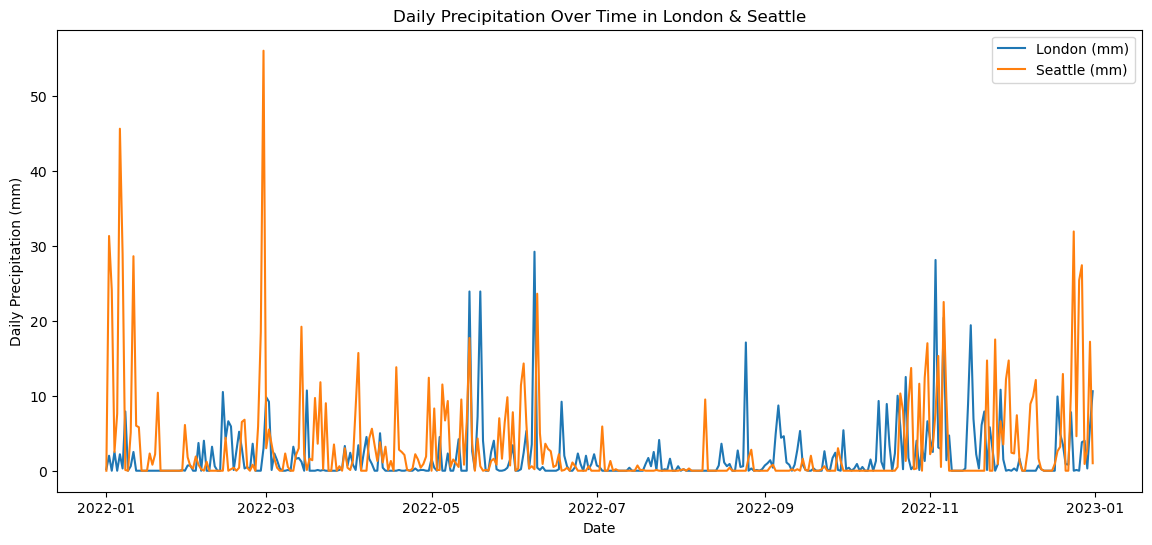

In [42]:
# Plot Daily London and Seattle Rainfall Over Time

plt.figure(figsize=(14, 6))
plt.plot(daily_sum.index, daily_sum[['London York', 'Seattle']], label=['London (mm)','Seattle (mm)'])
plt.title('Daily Precipitation Over Time in London & Seattle')
plt.xlabel('Date')
plt.ylabel('Daily Precipitation (mm)')
plt.legend()
plt.show()

In [43]:
# Resample Data to Rain Weekly Totals for cleaner visualization
# Resamples time-series data into daily frequency bins (one bin per day) assuming the data has a DatetimeIndex
weekly_sum = combined_temp.resample('W').sum() # then calculates the sum of all numeric columns for each daily bin.
print(weekly_sum.head())
weekly_sum.shape

            London York  Seattle
time                            
2022-01-02          2.2     31.3
2022-01-09         12.9    108.8
2022-01-16          3.1     45.5
2022-01-23          0.0     15.7
2022-01-30          0.1      6.1


(53, 2)

In [44]:
combined_temp.std(ddof=0 )

London York    0.404477
Seattle        0.463682
dtype: float64

In [45]:
# calculate st deviations for each week and add them to the line graph
# groups data by week (week-ending Sundays by default).
weekly_std_lo = df['precipitation'].resample('W').std()
weekly_std_lo.columns = ['London_weekly_prepcip_std'] # not working... not sure why???
print(weekly_std_lo.head())

time
2022-01-02    0.170054
2022-01-09    0.256408
2022-01-16    0.065332
2022-01-23    0.000000
2022-01-30    0.007715
Freq: W-SUN, Name: precipitation, dtype: float64


In [46]:
# calculate st deviations for each week and add them to the line graph
# groups data by week (week-ending Sundays by default).
weekly_std_se = df_se['precipitation'].resample('W').std()
weekly_std_se.columns = ['Seattle_weekly_prepcip_std']  # not working... not sure why???
print(weekly_std_se.head())

time
2022-01-02    1.591733
2022-01-09    1.143739
2022-01-16    0.649583
2022-01-23    0.361656
2022-01-30    0.240863
Freq: W-SUN, Name: precipitation, dtype: float64


In [47]:
weekly_precip = weekly_sum.merge(weekly_std_lo, left_index= True, right_index = True, how = 'left')\
.merge(weekly_std_se, left_index = True, right_index = True, how = 'left')
weekly_precip.columns = ['weekly London precipitation', 'weekly Seattle precipitation', 'London st dev', 'Seattle st dev']
weekly_precip.head()

,weekly London precipitation,weekly Seattle precipitation,London st dev,Seattle st dev
time,,,,
2022-01-02,2.2,31.3,0.170054,1.591733
2022-01-09,12.9,108.8,0.256408,1.143739
2022-01-16,3.1,45.5,0.065332,0.649583
2022-01-23,0.0,15.7,0.000000,0.361656
2022-01-30,0.1,6.1,0.007715,0.240863


In [48]:
print(weekly_precip.index.shape)
print(weekly_precip.shape)
weekly_precip.iloc[:,0:2].head()

(53,)
(53, 4)


,weekly London precipitation,weekly Seattle precipitation
time,,
2022-01-02,2.2,31.3
2022-01-09,12.9,108.8
2022-01-16,3.1,45.5
2022-01-23,0.0,15.7
2022-01-30,0.1,6.1


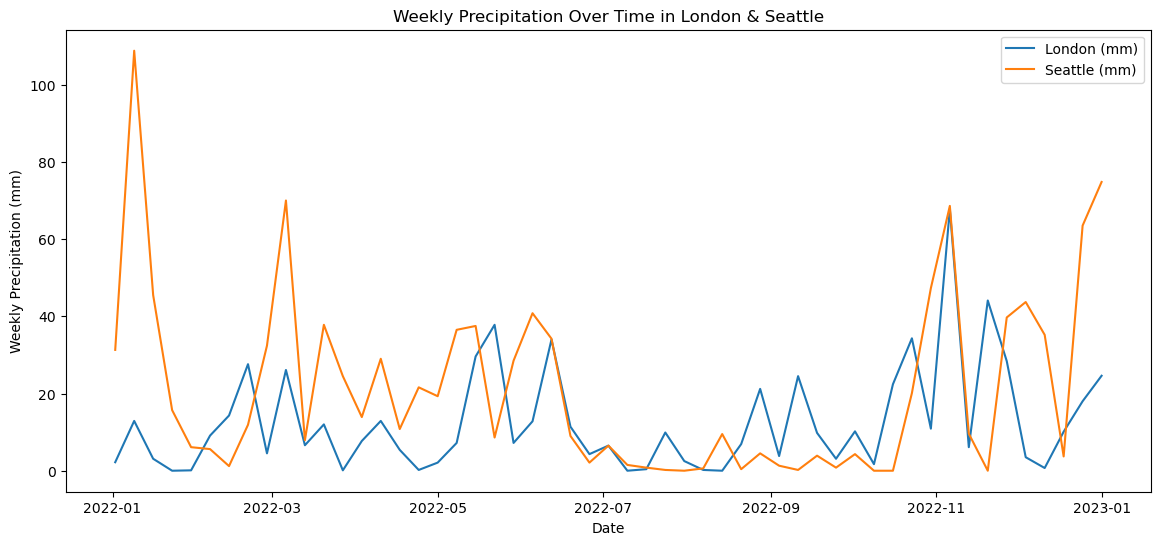

In [49]:
# Plot Weekly London and Seattle Rainfall Totals Over Time
plt.figure(figsize=(14, 6))
plt.plot(weekly_precip.index, weekly_precip[['weekly London precipitation','weekly Seattle precipitation']], label=['London (mm)','Seattle (mm)'])
plt.title('Weekly Precipitation Over Time in London & Seattle')
plt.xlabel('Date')
plt.ylabel('Weekly Precipitation (mm)')
plt.legend()
plt.show()

In [50]:
# Try creating a histogram with monthly precipitation totals
# First create a monthly precipitation data frame and update the index with month names
monthly_sum = combined_temp.resample('ME').sum() # then calculates the sum of all numeric columns for each daily bin.
monthly_sum.head()
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October','November','December']
monthly_sum.index = months

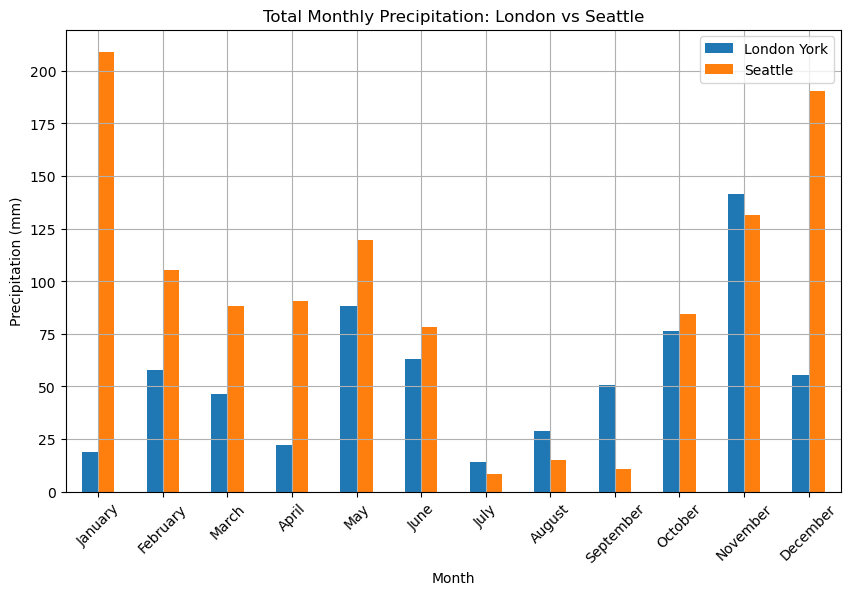

In [51]:
# create the bar plot
monthly_sum.plot(kind='bar', figsize=(10, 6))
plt.title('Total Monthly Precipitation: London vs Seattle')
plt.xlabel('Month')
plt.ylabel('Precipitation (mm)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [101]:
print(daily_sum.std())
monthly_sum.sum()

London York    3.869658
Seattle        6.600102
dtype: float64


London York     662.8
Seattle        1131.2
dtype: float64

In [98]:
1131.2/662.8

1.706698853349427

## **Analysis**: Determine which city had more rainfall overall and identify any interesting patterns.
Seattle had 71% more rain fall than London.This was true every month except July, August, September, and November. The daily rainfall in Seattle was also more variable than in London.